# Evaluating Dimensionality Reduction - PCA vs t-SNE

Evaluating the effectiveness of dimensionality reduction techniques, such as Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE), requires a multifaceted approach tailored to the specific aims and context of the analysis. These methods serve to transform high-dimensional data into a lower-dimensional space while striving to preserve certain properties of the original data. The choice of evaluation criteria and methods significantly depends on the intended application of the dimensionality reduction, whether it be for visualization purposes, to facilitate clustering, or to enhance the performance of classification algorithms. Below, we explore a variety of strategies for assessing the performance of PCA and t-SNE, accompanied by Python code examples. It's crucial to recognize that the efficacy of these techniques is highly contingent on the characteristics of the dataset in question and the specific objectives sought through the reduction process.

For this experiment, we will use the [SKLearn Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), which comprises of a number of 16x16 digit representations.

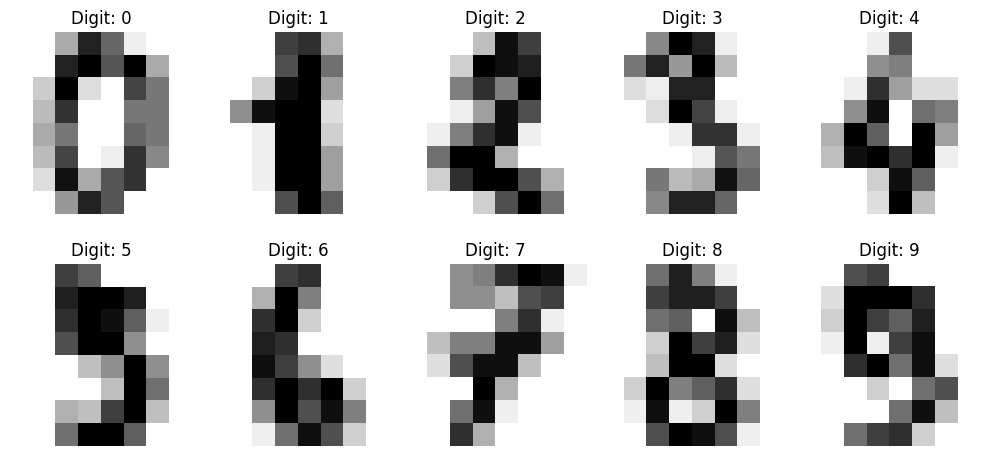

In [78]:
# Show an image of digits 0 to 9 from the digits dataset

import matplotlib.pyplot as plt
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Create a figure with subplots in a 2x5 grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Flatten the array of axes
axes = axes.flatten()

for i in range(10):
    # Find the first occurrence of each digit
    index = digits.target.tolist().index(i)
    
    # Plot on the ith subplot
    axes[i].imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].set_title(f'Digit: {i}')
    axes[i].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()


## Visual inspection

One of the simplest ways to evaluate PCA and t-SNE is by visually inspecting the reduced dimensions to see how well they separate different classes or clusters.

```{index} Dimensionality Reduction ; PCA
```

```{index} Dimensionality Reduction ; t-SNE
```

Before Dimensionality Reduction
(1797, 64)
After PCA
(1797, 2)
After t-SNE
(1797, 2)


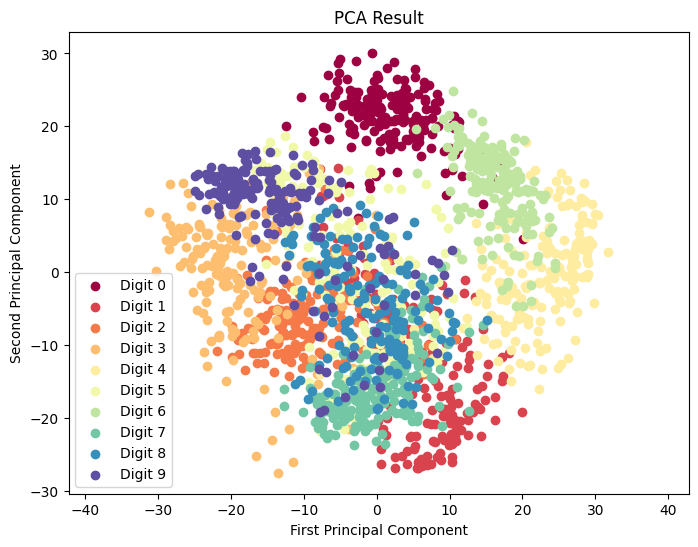

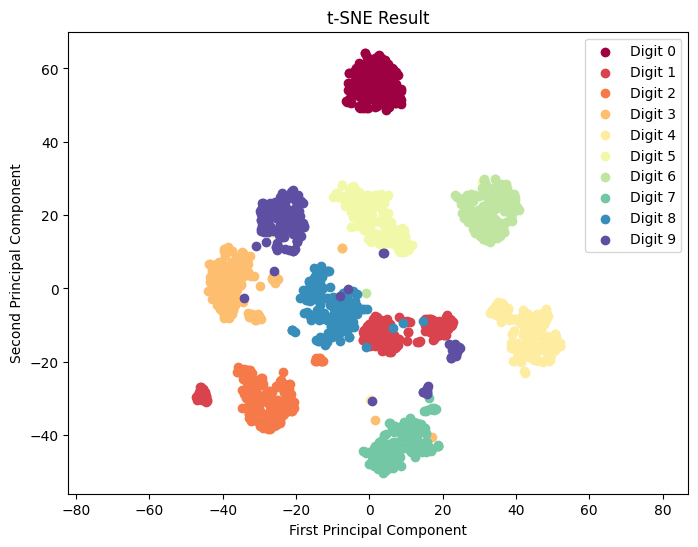

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

X = digits.data
y = digits.target

print("Before Dimensionality Reduction")
print(X.shape)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("After PCA")
print(X_pca.shape)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

print("After t-SNE")
print(X_tsne.shape)

# Plotting function
def plot_reduction(X, y, title):
    plt.figure(figsize=(8, 6))
    # Define a colormap
    colors = plt.cm.Spectral(np.linspace(0, 1, 10))
    
    # Plot each digit with a unique color from the colormap
    for i, color in zip(range(10), colors):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=f'Digit {i}')
    
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis('equal')  # Equal aspect ratio ensures that PCA1 and PCA2 are scaled the same
    # Add a legend
    plt.legend()
    plt.show()


# Plot results
plot_reduction(X_pca, y, 'PCA Result')
plot_reduction(X_tsne, y, 't-SNE Result')


From the analysis presented, it's evident that t-SNE provides a significantly clearer and more distinct separation among the clusters corresponding to each digit compared to PCA. t-SNE's strength lies in its ability to maintain the local relationships between data points, resulting in well-defined clusters that are easily distinguishable from one another. This contrast starkly with PCA, which, while reducing dimensionality in a way that preserves global variance, tends to overlap different digits more frequently. Consequently, the clusters formed by PCA are not as neatly segregated, making it harder to visually discern the distinct groups of digits. This observation underscores t-SNE's advantage in scenarios where the preservation of local data structures is crucial for identifying nuanced patterns or clusters within the dataset.

## Quantitative measures for clustering quality

```{index} Clustering ; silhouette score
```

For datasets with labeled classes such as this one, metrics like Silhouette Score can help quantify how well the reduced dimensions separate different classes.

```{note}
The Silhouette Score is a metric used to calculate the efficiency of the clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The Silhouette Score provides a way to assess the distance between the resulting clusters. The score is calculated for each sample in the dataset, and the average score is used to evaluate the overall quality of the clustering.

The value of the score ranges from -1 to 1:

- A score close to +1 indicates that the sample is far away from the neighboring clusters.
- A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the sample is placed in the wrong cluster.
```

In [80]:
from sklearn.metrics import silhouette_score

# Silhouette Score for PCA
silhouette_pca = silhouette_score(X_pca, y)
print(f"PCA Silhouette Score: {silhouette_pca}")

# Silhouette Score for t-SNE
silhouette_tsne = silhouette_score(X_tsne, y)
print(f"t-SNE Silhouette Score: {silhouette_tsne}")


PCA Silhouette Score: 0.10505282283403021
t-SNE Silhouette Score: 0.5548182725906372


## Classification performance

Another way to evaluate the effectiveness of PCA and t-SNE is to use the reduced dimensions as input for a classifier and compare the classification accuracy. This can help determine if the reduced dimensions capture the essential information needed for classification tasks. In this case, we use a simple Random Forest classifier to compare the classification accuracy of PCA and t-SNE reduced dimensions.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset for PCA and t-SNE results
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_tsne, X_test_tsne, _, _ = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Train and evaluate a classifier on PCA results
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"PCA Classification Accuracy: {accuracy_pca}")

# Train and evaluate a classifier on t-SNE results
clf_tsne = RandomForestClassifier(random_state=42)
clf_tsne.fit(X_train_tsne, y_train)
y_pred_tsne = clf_tsne.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
print(f"t-SNE Classification Accuracy: {accuracy_tsne}")


PCA Classification Accuracy: 0.6259259259259259
t-SNE Classification Accuracy: 0.9851851851851852


## Time complexity

Finally, comparing the time it takes to perform the reduction can be important, especially for large datasets. t-SNE is known to be computationally expensive compared to PCA, so understanding the time complexity of each method can help in choosing the right technique for the task at hand.

In [82]:
import time

# Time PCA
start = time.time()
pca.fit_transform(X)
end = time.time()
print(f"PCA Time: {end - start} seconds")

# Time t-SNE
start = time.time()
tsne.fit_transform(X)
end = time.time()
print(f"t-SNE Time: {end - start} seconds")


PCA Time: 1.2000350952148438 seconds
t-SNE Time: 5.028223991394043 seconds


## Final remarks

In conclusion, the evaluation of dimensionality reduction techniques like PCA and t-SNE is a multifaceted process that requires a combination of visual inspection, quantitative metrics, and performance evaluation using classification algorithms. The choice of evaluation criteria should be tailored to the specific objectives of the analysis, whether it be for visualization, clustering, or classification tasks. While PCA is useful for preserving global variance and reducing dimensionality, t-SNE excels at maintaining local relationships and forming distinct clusters. Understanding the strengths and limitations of each technique is crucial for selecting the most appropriate method for a given dataset and analysis goal.